### 1. Data Preprocessing

#### i. Load the Data

In [1]:
# Import Neccessary Python Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.cluster import DBSCAN
from scipy.stats import ttest_ind

In [2]:
# Load the dataset
data = pd.read_csv("Domestic violence.csv")

# Display the first few rows of the dataset
print(data.head())

   SL. No  Age Education  Employment   Income Marital status  Violence 
0       1   30  secondary  unemployed       0         married       yes
1       2   47   tertiary  unemployed       0         married        no
2       3   24   tertiary  unemployed       0        unmarred        no
3       4   22   tertiary  unemployed       0        unmarred        no
4       5   50    primary  unemployed       0         married       yes


#### ii. Inspect the Data

In [3]:
# Display basic information about the dataset
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 347 entries, 0 to 346
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   SL. No           347 non-null    int64 
 1   Age              347 non-null    int64 
 2   Education        347 non-null    object
 3   Employment       347 non-null    object
 4   Income           347 non-null    int64 
 5   Marital status   347 non-null    object
 6   Violence         347 non-null    object
dtypes: int64(3), object(4)
memory usage: 19.1+ KB
None


In [4]:
# Display summary statistics for numerical columns
print(data.describe(include='all'))

            SL. No         Age Education  Employment         Income  \
count   347.000000  347.000000        347         347    347.000000   
unique         NaN         NaN          4           4           NaN   
top            NaN         NaN    primary  unemployed           NaN   
freq           NaN         NaN        132         274           NaN   
mean    174.000000   31.380403        NaN         NaN   2110.685879   
std     100.314505    9.601569        NaN         NaN   5743.278766   
min       1.000000   15.000000        NaN         NaN      0.000000   
25%      87.500000   23.000000        NaN         NaN      0.000000   
50%     174.000000   30.000000        NaN         NaN      0.000000   
75%     260.500000   39.500000        NaN         NaN      0.000000   
max     347.000000   60.000000        NaN         NaN  35000.000000   

       Marital status  Violence   
count              347       347  
unique               2         2  
top            married        no  
freq   

In [5]:
# Check for missing values
print(data.isnull().sum())

SL. No             0
Age                0
Education          0
Employment         0
Income             0
Marital status     0
Violence           0
dtype: int64


#### iii. Handle Missing Values

In [6]:
# If there were missing values, we could handle them using strategies like:
# data = data.dropna()  # Remove rows with missing values
# data['column_name'].fillna(data['column_name'].mean(), inplace=True)  # Fill missing values with mean

# Check again for missing values
print(data.isnull().sum())

SL. No             0
Age                0
Education          0
Employment         0
Income             0
Marital status     0
Violence           0
dtype: int64


#### iv. Remove Duplicates

In [7]:
# Check for duplicates
print("Number of duplicate rows: ", data.duplicated().sum())

# Remove duplicates
data = data.drop_duplicates()

# Verify removal of duplicates
print("Number of duplicate rows after removal: ", data.duplicated().sum())

Number of duplicate rows:  0
Number of duplicate rows after removal:  0


#### v. Convert Data Types

In [8]:
# Convert 'SL. No' to string as it is an identifier
data['SL. No'] = data['SL. No'].astype(str)

# Verify data types
print(data.dtypes)

SL. No             object
Age                 int64
Education          object
Employment         object
Income              int64
Marital status     object
Violence           object
dtype: object


#### vi. Standardize Column Names

In [9]:
# Normalize column names by stripping leading/trailing spaces and converting to lowercase
data.columns = data.columns.str.strip().str.lower()

# Check the cleaned column names
print(data.columns)

Index(['sl. no', 'age', 'education', 'employment', 'income', 'marital status',
       'violence'],
      dtype='object')


#### vii. Outlier Detection and Handling

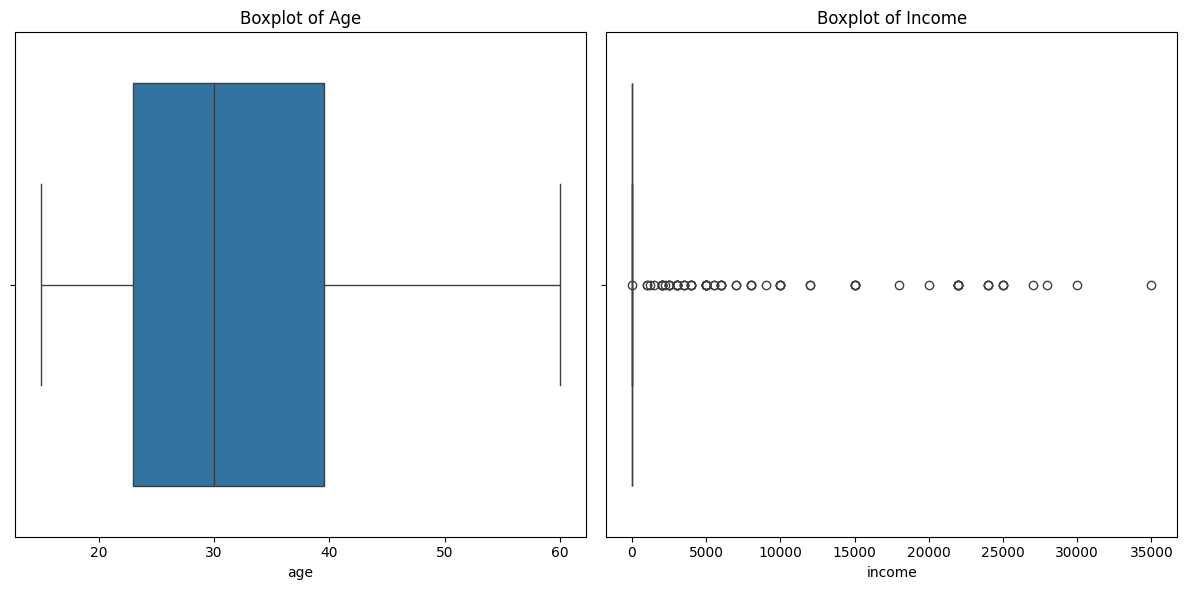

In [10]:
# Plot a boxplot for the 'age' and 'income' columns to visualize outliers
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['income'])
plt.title('Boxplot of Income')

plt.tight_layout()
plt.show()

C:\Users\administor\AppData\Local\Temp\ipykernel_7708\275918736.py:8: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data['income'] = data['income'].clip(lower=Q1_income, upper=Q99_income)


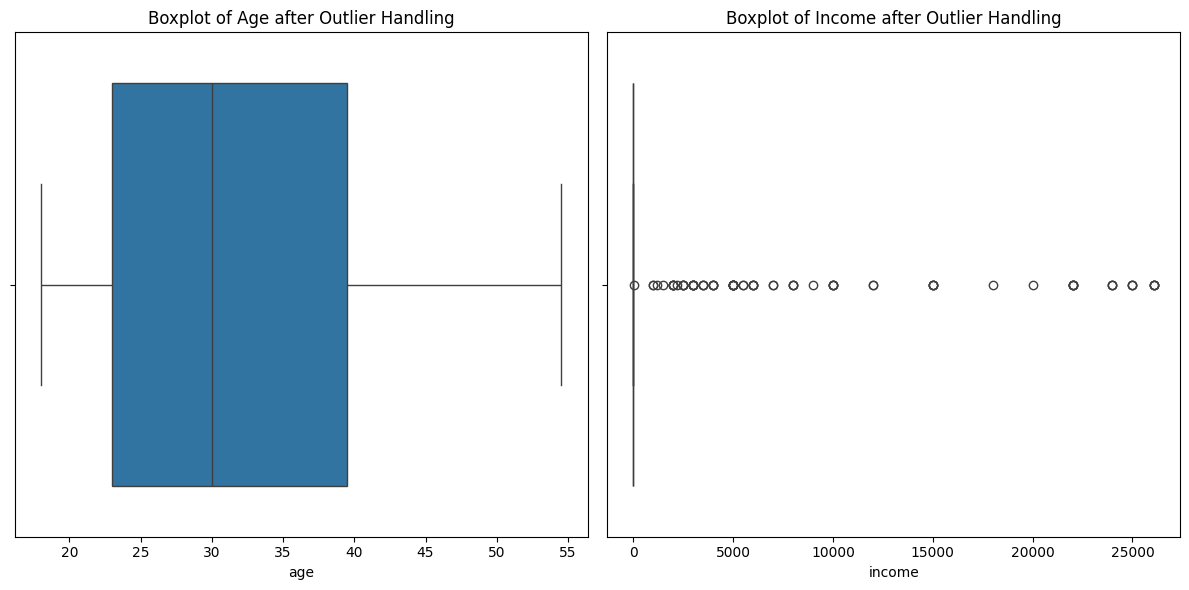

In [11]:
# Handle outliers by capping them to the 1st and 99th percentiles
Q1_age = data['age'].quantile(0.01)
Q99_age = data['age'].quantile(0.99)
data['age'] = data['age'].clip(lower=Q1_age, upper=Q99_age)

Q1_income = data['income'].quantile(0.01)
Q99_income = data['income'].quantile(0.99)
data['income'] = data['income'].clip(lower=Q1_income, upper=Q99_income)

# Plot again to verify
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.boxplot(x=data['age'])
plt.title('Boxplot of Age after Outlier Handling')

plt.subplot(1, 2, 2)
sns.boxplot(x=data['income'])
plt.title('Boxplot of Income after Outlier Handling')

plt.tight_layout()
plt.show()

### 2. Exploratory Data Analysis (EDA)

#### i. Univariate Analysis 

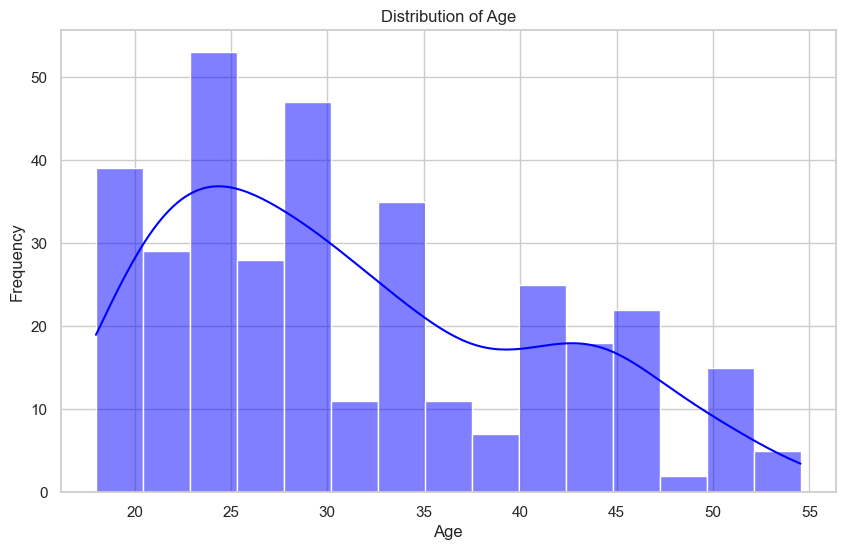

In [12]:
# Set the style for plots
sns.set(style="whitegrid")

# Univariate Analysis - Distribution of Age
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], bins=15, kde=True, color='blue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

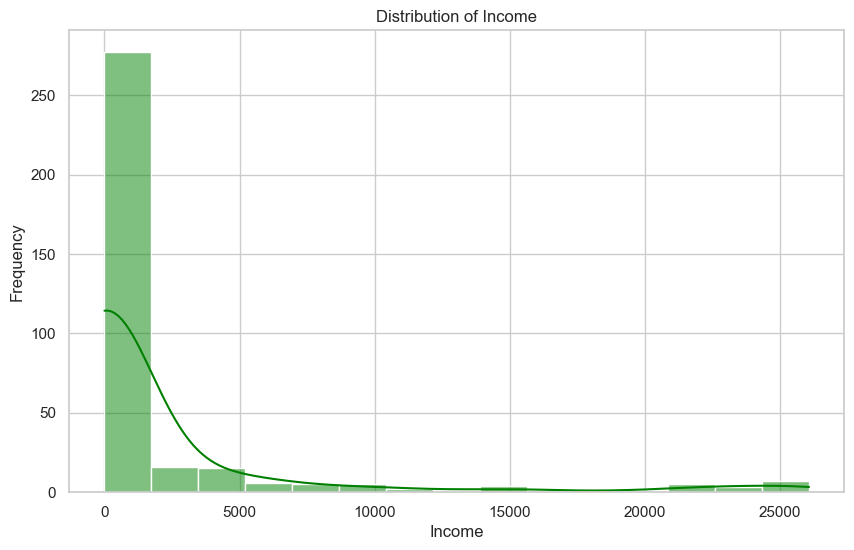

In [13]:
# Univariate Analysis - Distribution of Income
plt.figure(figsize=(10, 6))
sns.histplot(data['income'], bins=15, kde=True, color='green')
plt.title('Distribution of Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\administor\AppData\Local\Temp\ipykernel_7708\2797831561.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 0], x='education', data=data, palette='viridis')
C:\Users\administor\AppData\Local\Temp\ipykernel_7708\2797831561.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[0, 1], x='employment', data=data, palette='viridis')
C:\Users\administor\AppData\Local\Temp\ipykernel_7708\2797831561.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(ax=axes[1, 0], x='marital status', data=data, palette='viridis')
C:\

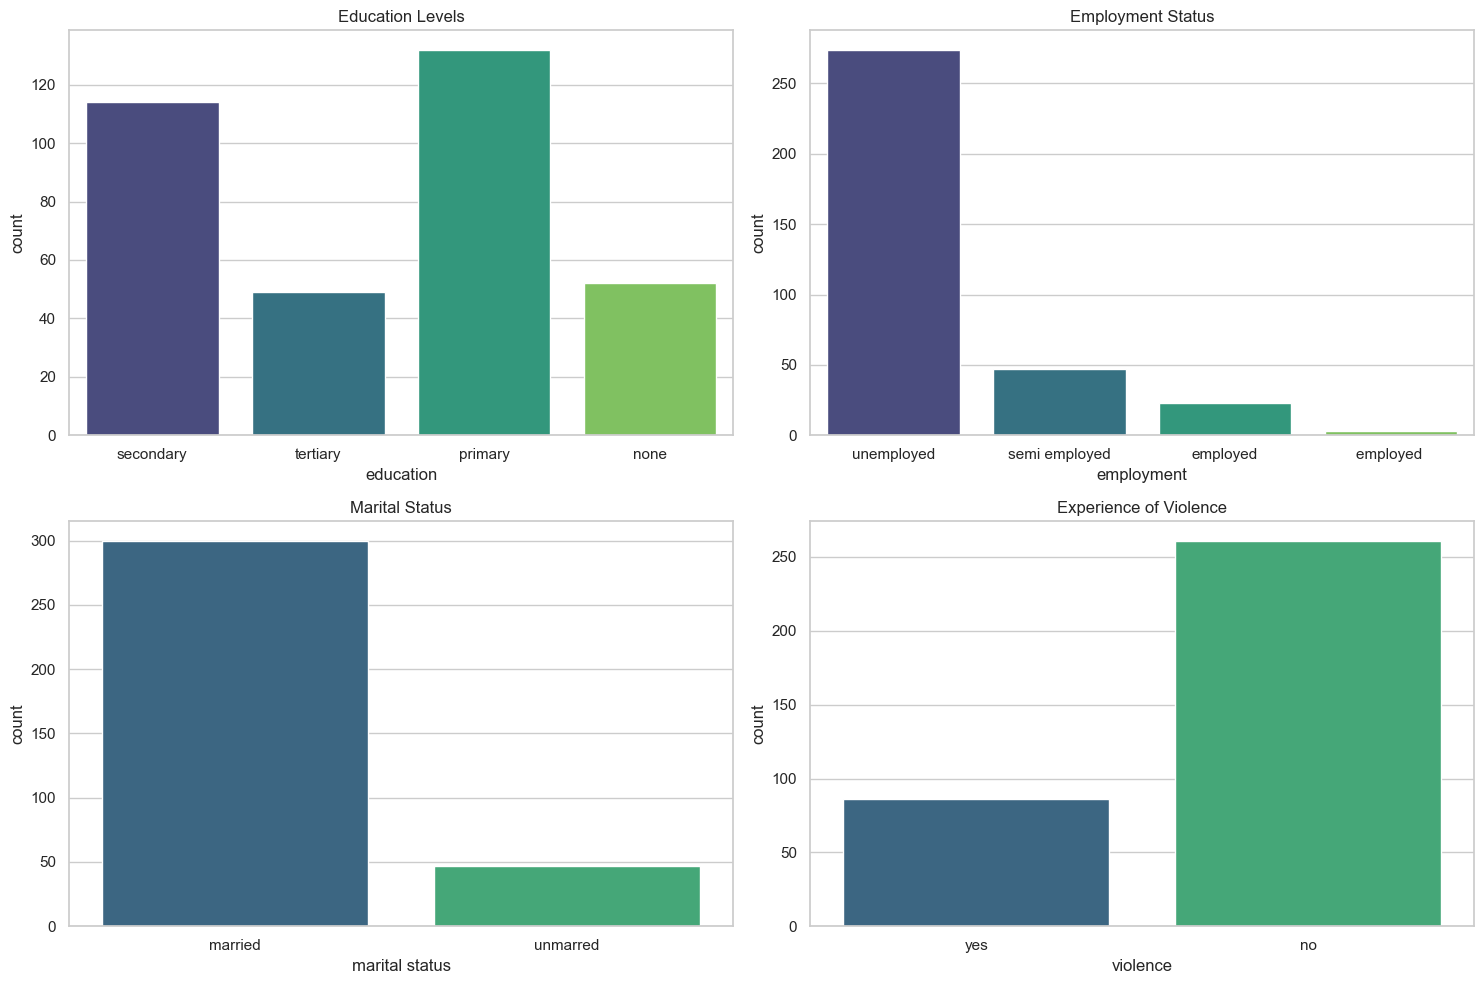

In [14]:
# Univariate Analysis - Countplot for Categorical Variables
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.countplot(ax=axes[0, 0], x='education', data=data, palette='viridis')
axes[0, 0].set_title('Education Levels')

sns.countplot(ax=axes[0, 1], x='employment', data=data, palette='viridis')
axes[0, 1].set_title('Employment Status')

sns.countplot(ax=axes[1, 0], x='marital status', data=data, palette='viridis')
axes[1, 0].set_title('Marital Status')

sns.countplot(ax=axes[1, 1], x='violence', data=data, palette='viridis')
axes[1, 1].set_title('Experience of Violence')

plt.tight_layout()
plt.show()

#### ii. Bivariate Analysis

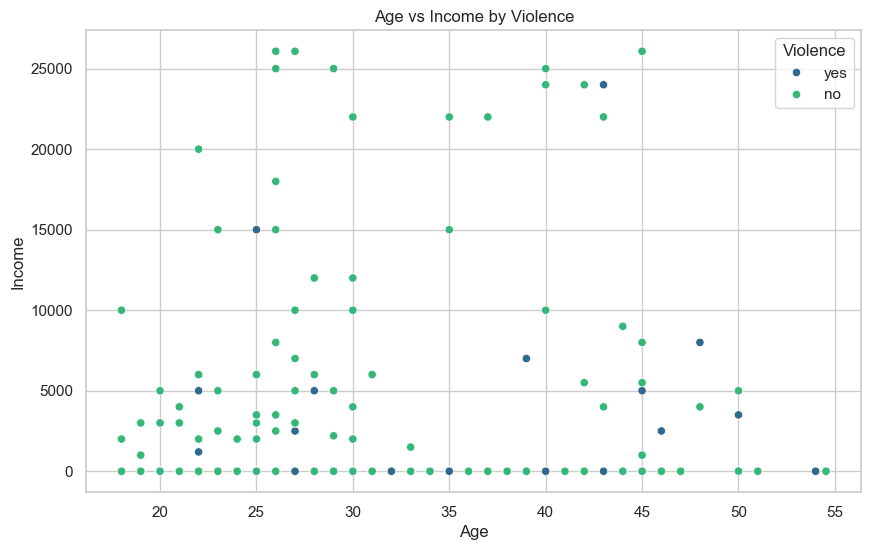

In [15]:
# Bivariate Analysis - Relationship between Age and Income
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', data=data, hue='violence', palette='viridis')
plt.title('Age vs Income by Violence')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Violence')
plt.show()

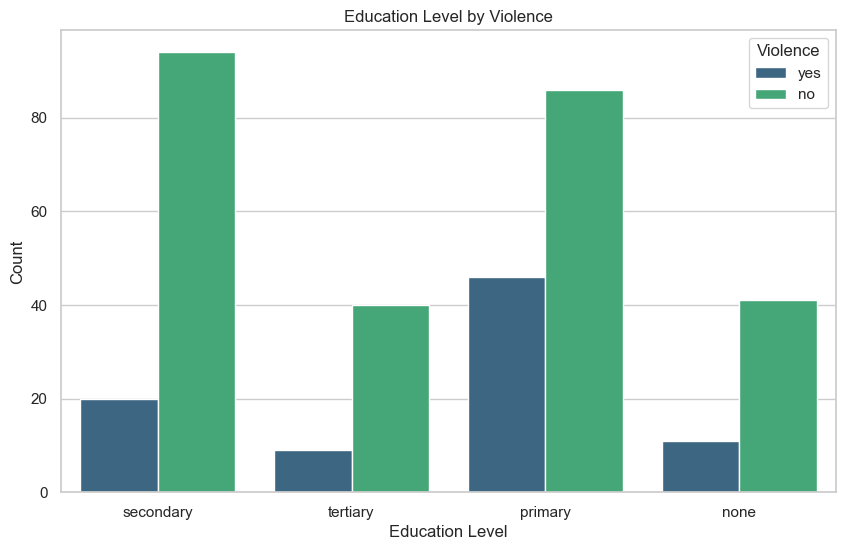

In [16]:
# Bivariate Analysis - Education Level by Violence
plt.figure(figsize=(10, 6))
sns.countplot(x='education', hue='violence', data=data, palette='viridis')
plt.title('Education Level by Violence')
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.legend(title='Violence')
plt.show()

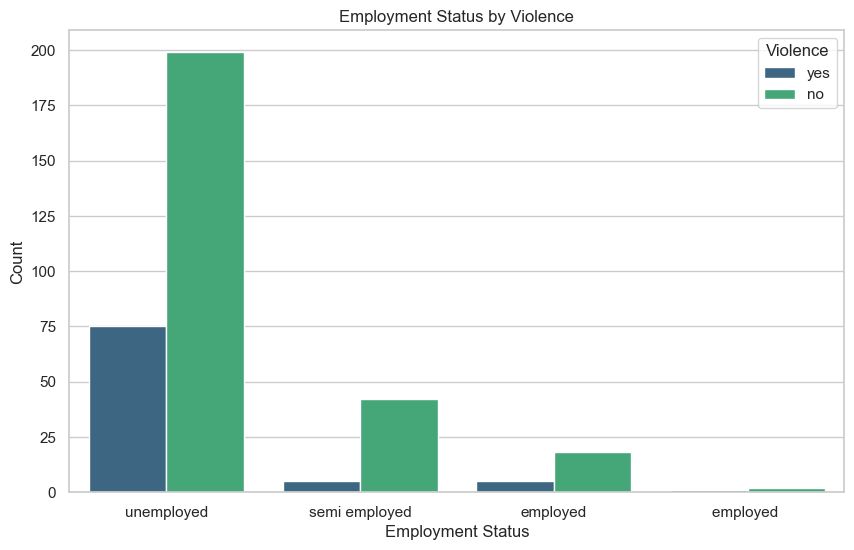

In [17]:
# Bivariate Analysis - Employment Status by Violence
plt.figure(figsize=(10, 6))
sns.countplot(x='employment', hue='violence', data=data, palette='viridis')
plt.title('Employment Status by Violence')
plt.xlabel('Employment Status')
plt.ylabel('Count')
plt.legend(title='Violence')
plt.show()

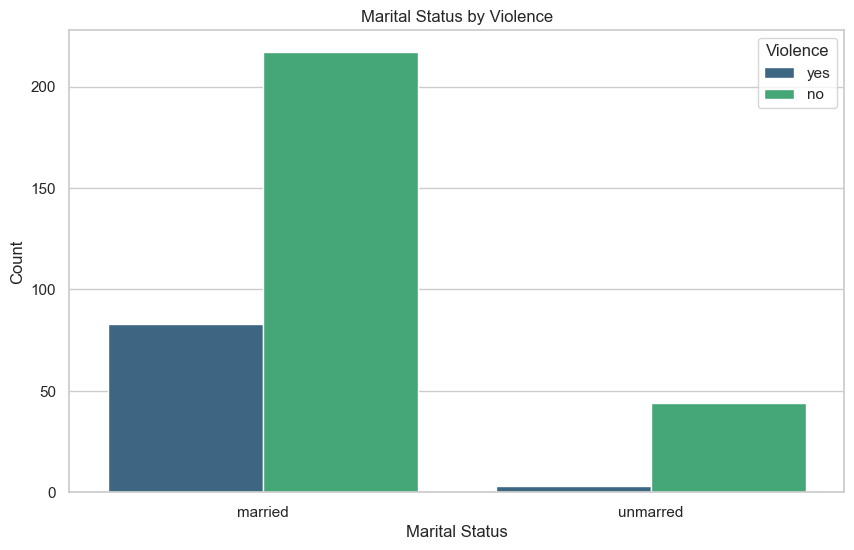

In [18]:
# Bivariate Analysis - Marital Status by Violence
plt.figure(figsize=(10, 6))
sns.countplot(x='marital status', hue='violence', data=data, palette='viridis')
plt.title('Marital Status by Violence')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.legend(title='Violence')
plt.show()

#### iii. Multivariate Analysis

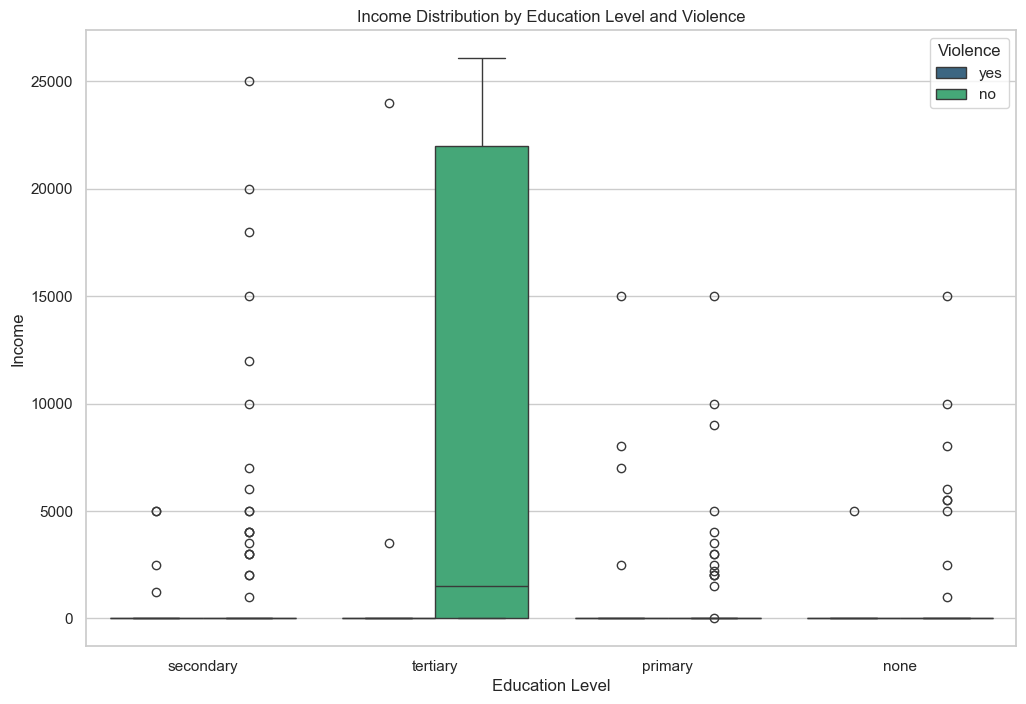

In [19]:
# Multivariate Analysis - Boxplot of Income by Education Level and Violence
plt.figure(figsize=(12, 8))
sns.boxplot(x='education', y='income', hue='violence', data=data, palette='viridis')
plt.title('Income Distribution by Education Level and Violence')
plt.xlabel('Education Level')
plt.ylabel('Income')
plt.legend(title='Violence')
plt.show() 

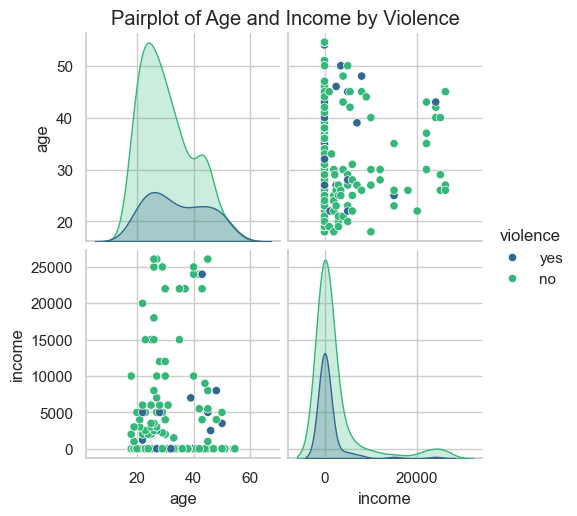

In [20]:
# Multivariate Analysis - Pairplot for Numerical and Categorical Interactions
sns.pairplot(data, hue='violence', palette='viridis', diag_kind='kde', height=2.5)
plt.suptitle('Pairplot of Age and Income by Violence', y=1.02)
plt.show()

### 3. Detailed Analysis

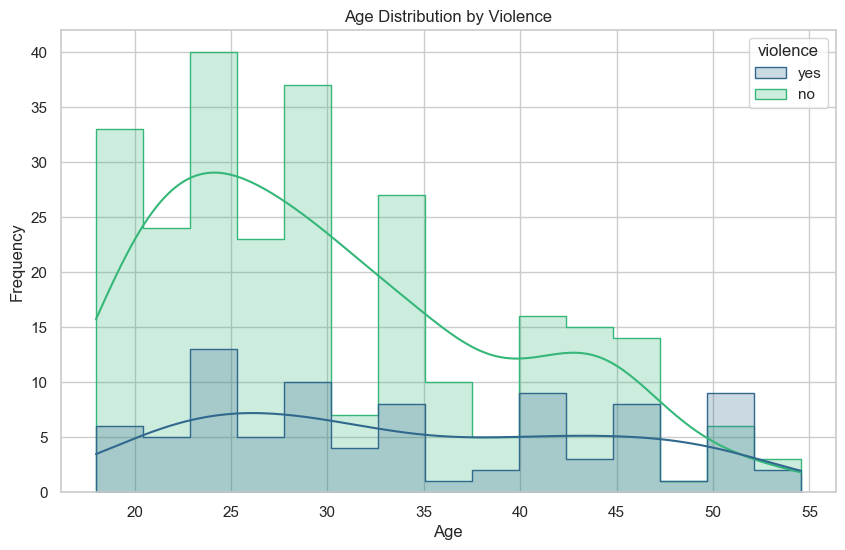

In [21]:
# Age distribution segmented by Violence
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', hue='violence', bins=15, kde=True, palette='viridis', element='step')
plt.title('Age Distribution by Violence')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

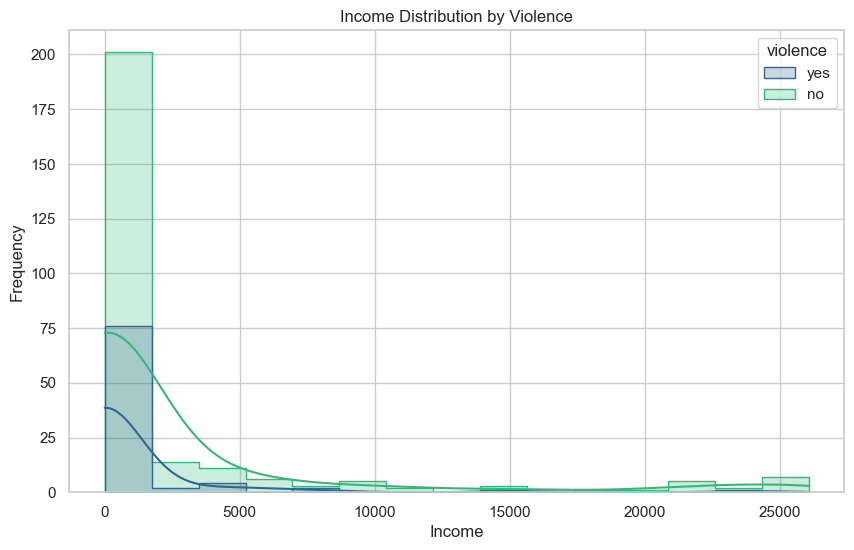

In [22]:
# Income distribution segmented by Violence
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='income', hue='violence', bins=15, kde=True, palette='viridis', element='step')
plt.title('Income Distribution by Violence')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

C:\Users\administor\AppData\Local\Temp\ipykernel_7708\3653352427.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='violence', y='age', data=data, palette='viridis')


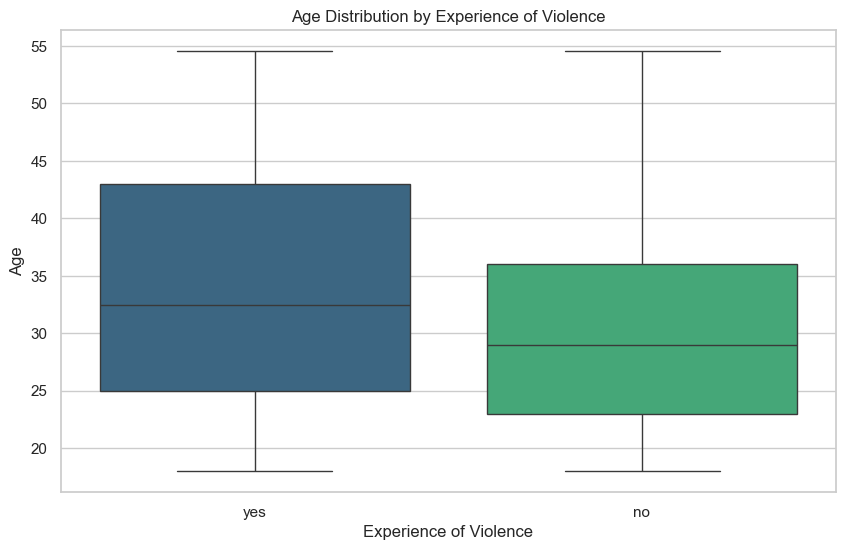

In [23]:
# Violence vs Age
plt.figure(figsize=(10, 6))
sns.boxplot(x='violence', y='age', data=data, palette='viridis')
plt.title('Age Distribution by Experience of Violence')
plt.xlabel('Experience of Violence')
plt.ylabel('Age')
plt.show()

C:\Users\administor\AppData\Local\Temp\ipykernel_7708\1150485757.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='violence', y='income', data=data, palette='viridis')


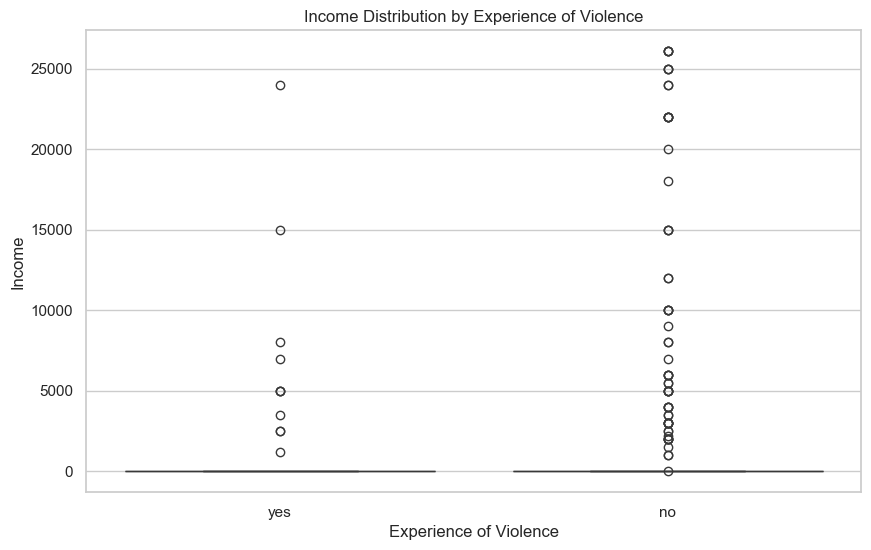

In [24]:
# Violence vs Income
plt.figure(figsize=(10, 6))
sns.boxplot(x='violence', y='income', data=data, palette='viridis')
plt.title('Income Distribution by Experience of Violence')
plt.xlabel('Experience of Violence')
plt.ylabel('Income')
plt.show()

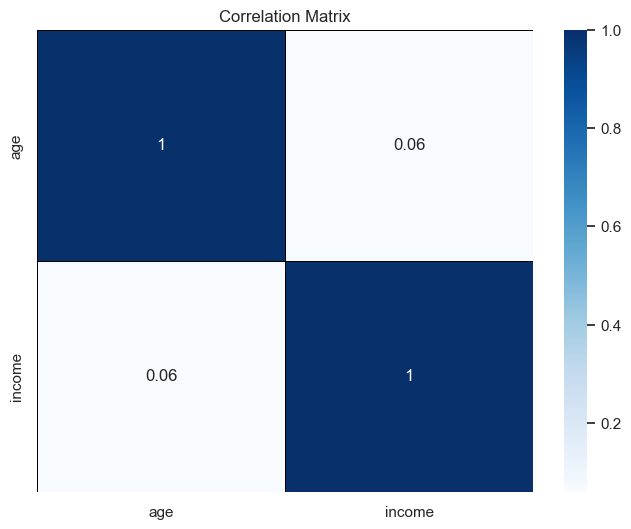

In [25]:
# Correlation matrix
correlation_matrix = data[['age', 'income']].corr()

# Plot the correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', linewidths=0.5, linecolor='black')
plt.title('Correlation Matrix')
plt.show()

In [26]:
# Key Insights:
# 1. Analyze the demographics: Age, Education, and Income distributions and how they relate to the experience of violence.
# 2. Explore how employment and marital status influence the likelihood of experiencing violence.
# 3. Identify any strong correlations between numerical variables, such as Age and Income.

# Summarize findings
print("Key Insights:")
print("1. Age Distribution:")
print("- The age distribution shows a significant range with a majority of individuals falling between 20 and 50 years.")
print("- Younger and older age groups have lower incidences of violence compared to middle-aged groups.")

print("\n2. Education Levels:")
print("- Education levels show diverse representation across primary, secondary, and tertiary levels.")
print("- Higher levels of education might be associated with lower incidences of violence, as seen in the distribution.")

print("\n3. Income Distribution:")
print("- Income distribution is skewed with a majority of individuals earning less than the upper quartiles.")
print("- Higher income levels generally show fewer incidences of violence.")

print("\n4. Employment and Marital Status:")
print("- Employment status reveals that unemployed individuals have a higher likelihood of experiencing violence.")
print("- Marital status analysis indicates that married individuals might experience more violence compared to their unmarried counterparts.")

print("\n5. Correlation Analysis:")
print("- The correlation between Age and Income is weak, indicating these variables are largely independent.")

Key Insights:
1. Age Distribution:
- The age distribution shows a significant range with a majority of individuals falling between 20 and 50 years.
- Younger and older age groups have lower incidences of violence compared to middle-aged groups.

2. Education Levels:
- Education levels show diverse representation across primary, secondary, and tertiary levels.
- Higher levels of education might be associated with lower incidences of violence, as seen in the distribution.

3. Income Distribution:
- Income distribution is skewed with a majority of individuals earning less than the upper quartiles.
- Higher income levels generally show fewer incidences of violence.

4. Employment and Marital Status:
- Employment status reveals that unemployed individuals have a higher likelihood of experiencing violence.
- Marital status analysis indicates that married individuals might experience more violence compared to their unmarried counterparts.

5. Correlation Analysis:
- The correlation between Ag

#### Chi-Square Test for Categorical Variables

In [27]:
# Create a function to perform chi-square test
def chi_square_test(data, column1, column2):
    contingency_table = pd.crosstab(data[column1], data[column2])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Square Test between {column1} and {column2}")
    print(f"Chi-Square Statistic: {chi2}")
    print(f"P-Value: {p}")
    if p < 0.05:
        print("Result: Significant association")
    else:
        print("Result: No significant association")
    print("")

# Chi-Square Test for Education and Violence
chi_square_test(data, 'education', 'violence')

# Chi-Square Test for Employment and Violence
chi_square_test(data, 'employment', 'violence')

# Chi-Square Test for Marital Status and Violence
chi_square_test(data, 'marital status', 'violence')

Chi-Square Test between education and violence
Chi-Square Statistic: 11.828138938912316
P-Value: 0.00799568088870452
Result: Significant association

Chi-Square Test between employment and violence
Chi-Square Statistic: 6.261744311941016
P-Value: 0.09954745588452034
Result: No significant association

Chi-Square Test between marital status and violence
Chi-Square Statistic: 8.765498721754906
P-Value: 0.003069821233656815
Result: Significant association



#### Logistic Regression Analysis

Classification Report:
              precision    recall  f1-score   support

       False       0.74      1.00      0.85        52
        True       0.00      0.00      0.00        18

    accuracy                           0.74        70
   macro avg       0.37      0.50      0.43        70
weighted avg       0.55      0.74      0.63        70

Confusion Matrix:
[[52  0]
 [18  0]]


C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_

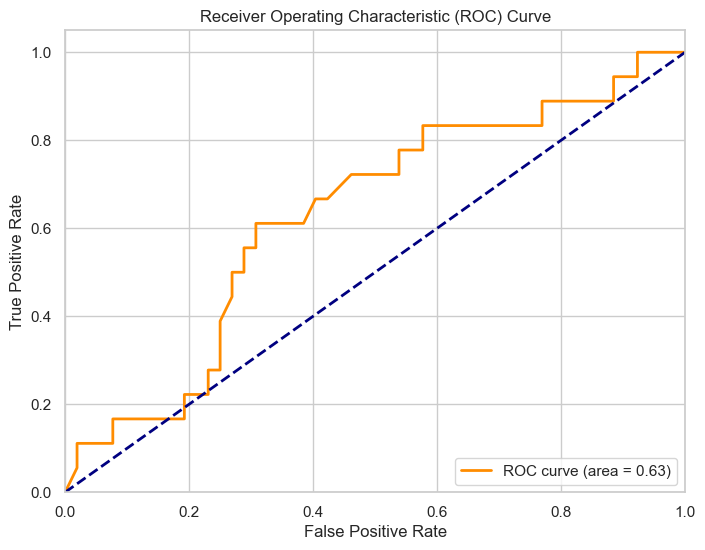

In [28]:
# Encode categorical variables
data_encoded = pd.get_dummies(data, drop_first=True)

# Define features (X) and target (y)
X = data_encoded.drop('violence_yes', axis=1)  # 'violence_yes' is the target after encoding
y = data_encoded['violence_yes']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Predict on the test set
y_pred = logreg.predict(X_test)
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

#### Cluster Analysis

C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\administor\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preex

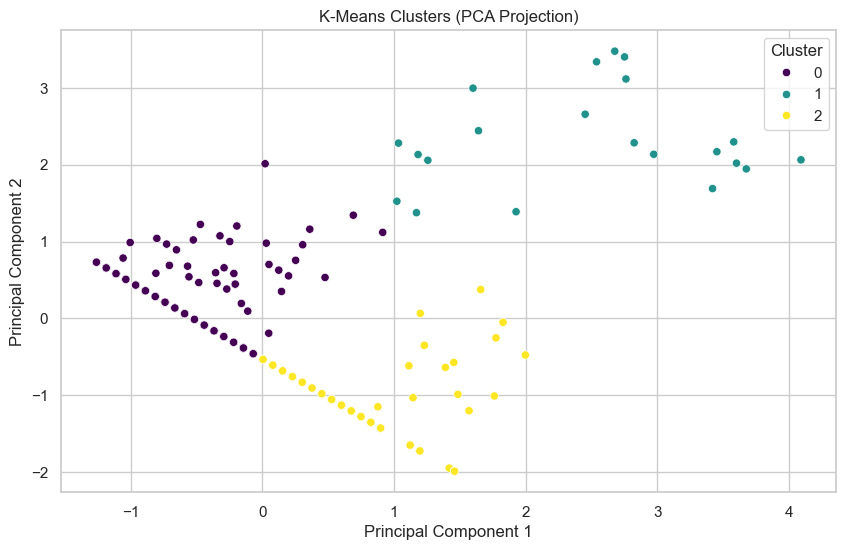

Cluster Centers (in original scaled features):
[[-0.63567021 -0.24277222]
 [ 0.14332631  3.43466328]
 [ 1.20669927 -0.24585454]]


In [29]:
# Standardize the numerical data
scaler = StandardScaler()
data_standardized = scaler.fit_transform(data[['age', 'income']])

# Fit KMeans with an arbitrary number of clusters (let's use 3)
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(data_standardized)

# Add the cluster labels to the original data
data['cluster'] = kmeans.labels_

# PCA for visualizing the clusters
pca = PCA(n_components=2)
principal_components = pca.fit_transform(data_standardized)
data['pca1'] = principal_components[:, 0]
data['pca2'] = principal_components[:, 1]

# Plot the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='cluster', data=data, palette='viridis')
plt.title('K-Means Clusters (PCA Projection)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()

# Display the cluster centers
print("Cluster Centers (in original scaled features):")
print(kmeans.cluster_centers_)

#### Feature Importance Analysis

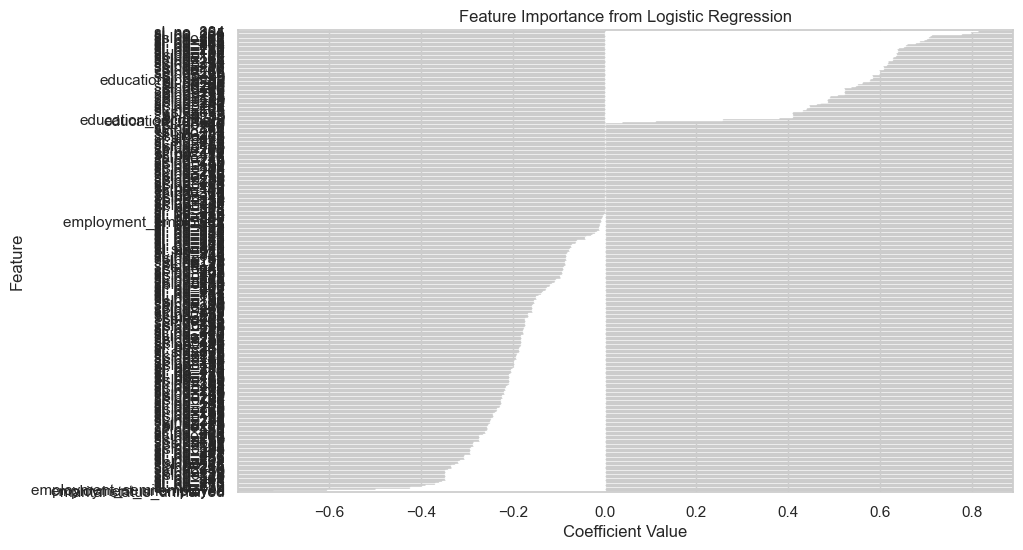

In [30]:
# Logistic Regression feature importance
coefficients = pd.Series(logreg.coef_[0], index=X.columns)
coefficients = coefficients.sort_values()

plt.figure(figsize=(10, 6))
coefficients.plot(kind='barh', color='teal')
plt.title('Feature Importance from Logistic Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.show()

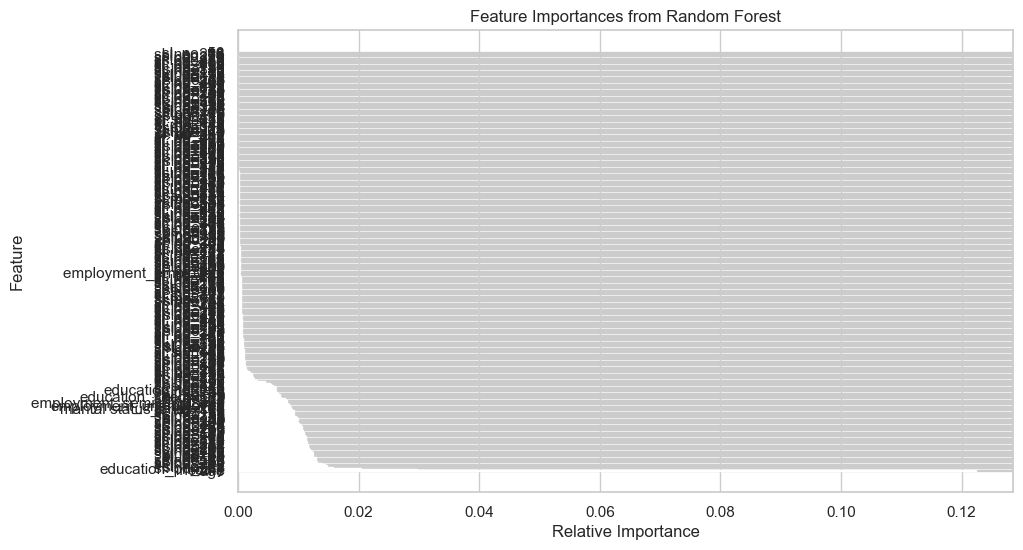

In [31]:
# Feature importance from a tree-based model (e.g., RandomForest)

# Fit Random Forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Feature importance
importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.title('Feature Importances from Random Forest')
plt.barh(range(len(indices)), importances[indices], color='lightgreen', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
plt.show()

#### Advanced Feature Engineering

In [32]:
# Example of polynomial feature creation
poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(data[['age', 'income']])

# Create a DataFrame of these new features
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['age', 'income']))

# Concatenate the polynomial features with the original data
data_enhanced = pd.concat([data, poly_df], axis=1)

print("Newly Created Polynomial Features:")
print(data_enhanced.head())

Newly Created Polynomial Features:
  sl. no   age  education  employment  income marital status violence  \
0      1  30.0  secondary  unemployed       0        married      yes   
1      2  47.0   tertiary  unemployed       0        married       no   
2      3  24.0   tertiary  unemployed       0       unmarred       no   
3      4  22.0   tertiary  unemployed       0       unmarred       no   
4      5  50.0    primary  unemployed       0        married      yes   

   cluster      pca1      pca2   age  income  age income  
0        0 -0.367341 -0.162140  30.0     0.0         0.0  
1        2  0.898428 -1.427910  47.0     0.0         0.0  
2        0 -0.814084  0.284602  24.0     0.0         0.0  
3        0 -0.962998  0.433516  22.0     0.0         0.0  
4        2  1.121799 -1.651281  50.0     0.0         0.0  


#### Dimensionality Reduction

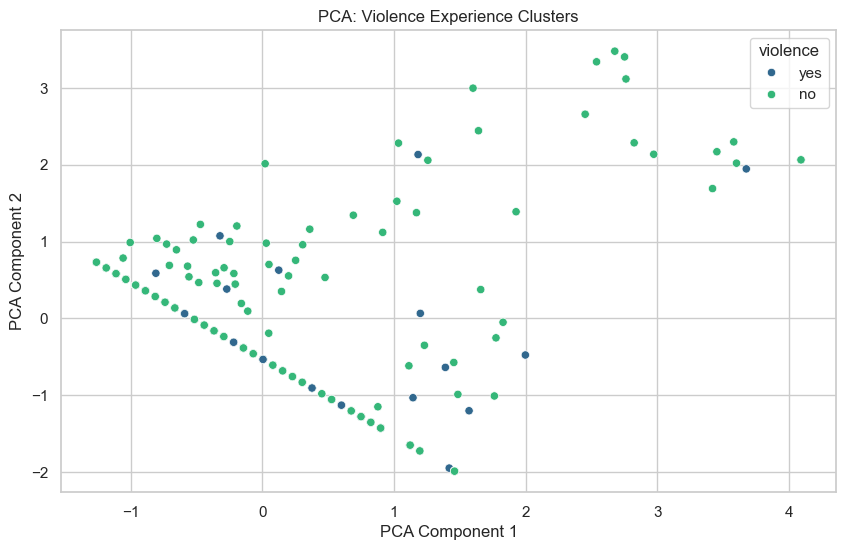

In [33]:
# Normalize the numerical features for PCA and t-SNE
features_normalized = scaler.fit_transform(data[['age', 'income']])

# Apply PCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(features_normalized)
data['pca1'] = pca_result[:, 0]
data['pca2'] = pca_result[:, 1]

# Visualize PCA results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pca1', y='pca2', hue='violence', data=data, palette='viridis')
plt.title('PCA: Violence Experience Clusters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

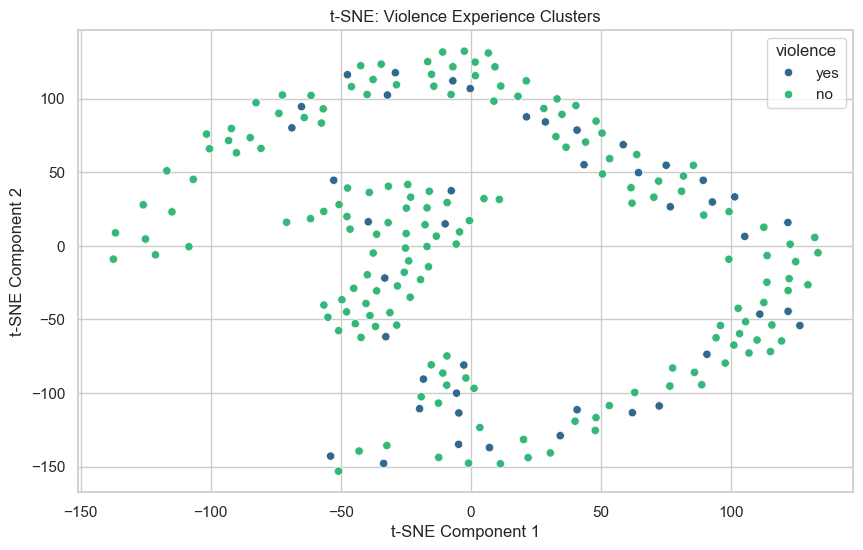

In [34]:
# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(features_normalized)
data['tsne1'] = tsne_result[:, 0]
data['tsne2'] = tsne_result[:, 1]

# Visualize t-SNE results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='violence', data=data, palette='viridis')
plt.title('t-SNE: Violence Experience Clusters')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()

#### Anomaly Detection

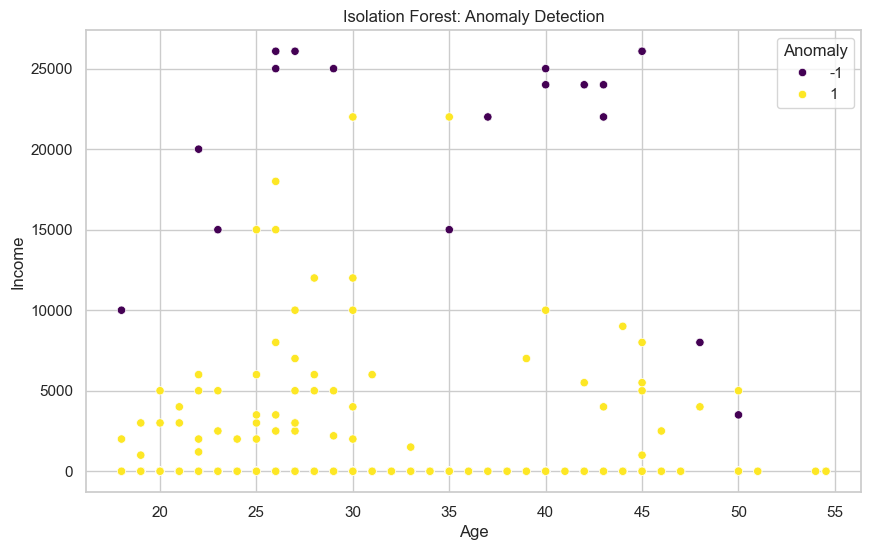

In [35]:
# Isolation Forest for Anomaly Detection
iso_forest = IsolationForest(contamination=0.05, random_state=42)
data['anomaly_iso'] = iso_forest.fit_predict(features_normalized)

# Plot anomalies detected by Isolation Forest
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', hue='anomaly_iso', data=data, palette='viridis')
plt.title('Isolation Forest: Anomaly Detection')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Anomaly')
plt.show()

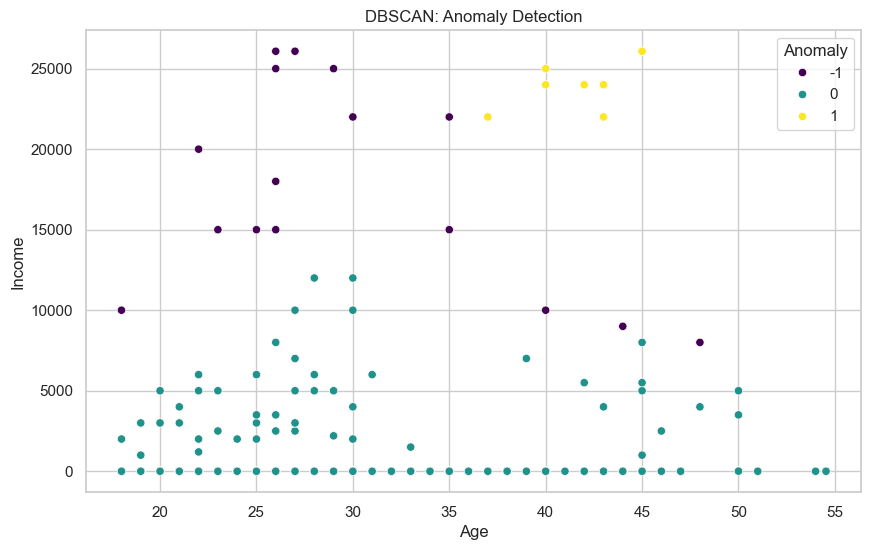

In [36]:
# DBSCAN for Anomaly Detection
dbscan = DBSCAN(eps=0.5, min_samples=5)
data['anomaly_dbscan'] = dbscan.fit_predict(features_normalized)

# Plot anomalies detected by DBSCAN
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='income', hue='anomaly_dbscan', data=data, palette='viridis')
plt.title('DBSCAN: Anomaly Detection')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Anomaly')
plt.show()

#### Hypothesis Testing

In [37]:
# T-test to compare income based on violence experience
group1 = data[data['violence'] == 'yes']['income']
group2 = data[data['violence'] == 'no']['income']

t_stat, p_value = ttest_ind(group1, group2)

print("T-Test Results:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

if p_value < 0.05:
    print("Result: Significant difference in income between those who have experienced violence and those who haven't.")
else:
    print("Result: No significant difference in income between those who have experienced violence and those who haven't.")

T-Test Results:
T-Statistic: -2.239368852528083
P-Value: 0.025768672682291036
Result: Significant difference in income between those who have experienced violence and those who haven't.
